In [2]:
from matplotlib.pylab import plt
import numpy as np
import pickle
from PIL import Image

In [3]:
def img_to_txt(I):
    sh = I.shape
    im = I.flatten()
    T = ''
    for i in im:
        T += chr(int(i))
    return T,sh

def txt_to_img(T,sh):
    M = []
    for i in T:
        M.append(ord(i))
    return np.array(M).reshape(sh)
def codage_LZW(M):
    w = ""
    code = []
    dict_size = 256
    D = {chr(i): i for i in range(dict_size)}
    for c in M:
        wc = w + c
        if wc in D:
            w = wc
        else:
            code.append(D[w])
            D[wc] = dict_size
            dict_size += 1
            w = c
    if w:
        code.append(D[w])
    return code
def decodage_LZW(M):
    dict_size = 256
    D = {i: chr(i) for i in range(dict_size)}
    w = chr(M[0])
    M = M[1:]
    code = w
    e = w
    for i in M:
        if i in D.keys():
            e = D[i]
        elif i == dict_size:
            e = w + w[0]
        code += e
        D[dict_size] = w + e[0]
        dict_size += 1
        w = e
    return code
def LZW_img(I,sh,op):
    if op == "decodage":
        return txt_to_img(decodage_LZW(I),sh)
    elif op == "codage":
        C = img_to_txt(I)
        CC = []
        CC.extend(C[1])
        CC.extend(codage_LZW(C[0]))
        return np.array(CC)
    else :
        return "choix n'exeite pas"

In [10]:
img = plt.imread("sample_1920×1280.bmp")
L = LZW_img(img,None,"codage")

In [11]:
L

array([   1280,    1920,       3, ...,    3748, 1013683, 1188958])

In [12]:
with open("hh.irm",'ab') as op:
    op.write(L.tobytes())

In [13]:
with open("hh.irm",'rb') as op:
    res = np.frombuffer(op.read(),dtype=int)

In [14]:
res

array([   1280,    1920,       3, ...,    3748, 1013683, 1188958])

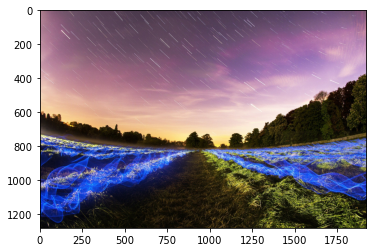

In [15]:
d_img_test = LZW_img(res[3:],res[:3],"decodage")
plt.imshow(d_img_test)


In [16]:
picture = Image.open("sample_1920×1280.bmp")
picture.save("Compressed", 
                 "JPEG", 
                 optimize = True, 
                 quality = 10)